In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [56]:
path = 'https://raw.githubusercontent.com/AlexeyKamaev/test/main/_data.csv'
df = pd.read_csv(path)
pd.set_option('display.max_columns', None)

In [57]:
df.head()

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615


In [58]:
# Удаление колонок Ссылка на объявление, Телефоны
df = df.rename(columns={'Площадь, м2':'Площадь'}).drop('Ссылка на объявление',axis = 1).drop('Unnamed: 0',axis = 1).drop('Телефоны',axis = 1)

In [59]:
# Удаление строк, где адрес не Москва
df = df[df['Адрес'].str.contains('Москва')]

In [60]:
# Удаление пропусков по колонке Метро, поскольку ключевым фактором в предсказывании цены будет именно станция метро 
df = df.dropna(subset=['Метро'])

# Площаль, цена и станция метро

In [61]:
# Получение станции метро из колонки Метро 
def func (y):
    y[:y.find('(')]
    return y[:y.find('(')].strip()

def func2 (y):
    y[:y.find('(')]
    return y[y.find('м. ')+3:].strip()

x = df['Метро'].map(func).map(func2).copy()
df.insert(3, "Станция", x)

In [62]:
# Обработка колонки Площадь
from operator import methodcaller
def func(x):
  return float(x[0])
point_place = df['Площадь'].map(methodcaller("split", "/")).map(func).copy()
df.insert(5, "Общая площадь",point_place)

In [63]:
# Обработка колонки Цена
def get_price(y):
  r = ''
  for i in y:
    if i.isdigit():
      r += i
    else:
      r += ' '
  return int(r.split()[0])

def get_deposit(y):
  r = ''
  for i in y:
    if i.isdigit():
      r += i
    else:
      r += ' '
  try:
      if int(r.split()[2]) < 1000 or int(r.split()[2]) > int(r.split()[0]) * 6:
        return int(r.split()[0])
      else:
        return int(r.split()[2])
  except:
      return int(r.split()[0])
    
x1 = df['Цена'].map(get_price) 
x2 = df['Цена'].map(get_deposit) 

In [64]:
df.insert(9, "Цена за месяц",x1)
df.insert(10,'Залог',x2)

In [65]:
metro = pd.read_csv('out.csv', sep=',')
metro = metro.rename(columns={'Station':'Станция'}).drop_duplicates('Станция').loc[:,'Станция':'District']

metro

x = df.copy()

In [71]:
# m = df.merge(metro, how = 'left', on='Станция')
df = m.copy()

# Графики

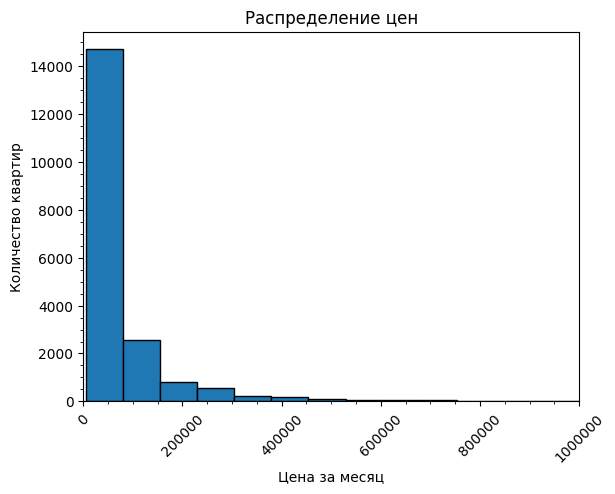

In [72]:
# Распределение цен
fig, ax = plt.subplots()
ax.hist(df['Цена за месяц'], bins = 40, edgecolor='black')
ax.minorticks_on()

plt.title('Распределение цен')
plt.xlabel('Цена за месяц')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0, 1000000)
plt.ylabel('Количество квартир');

Судя по распределению цен большинство квартир находится в ценовом диапазоне до 100000 руб в месяц

In [73]:
price_area = df.groupby('Станция', as_index=False).agg({'Общая площадь':['count','mean'],'Цена за месяц':'mean'}).round(2)

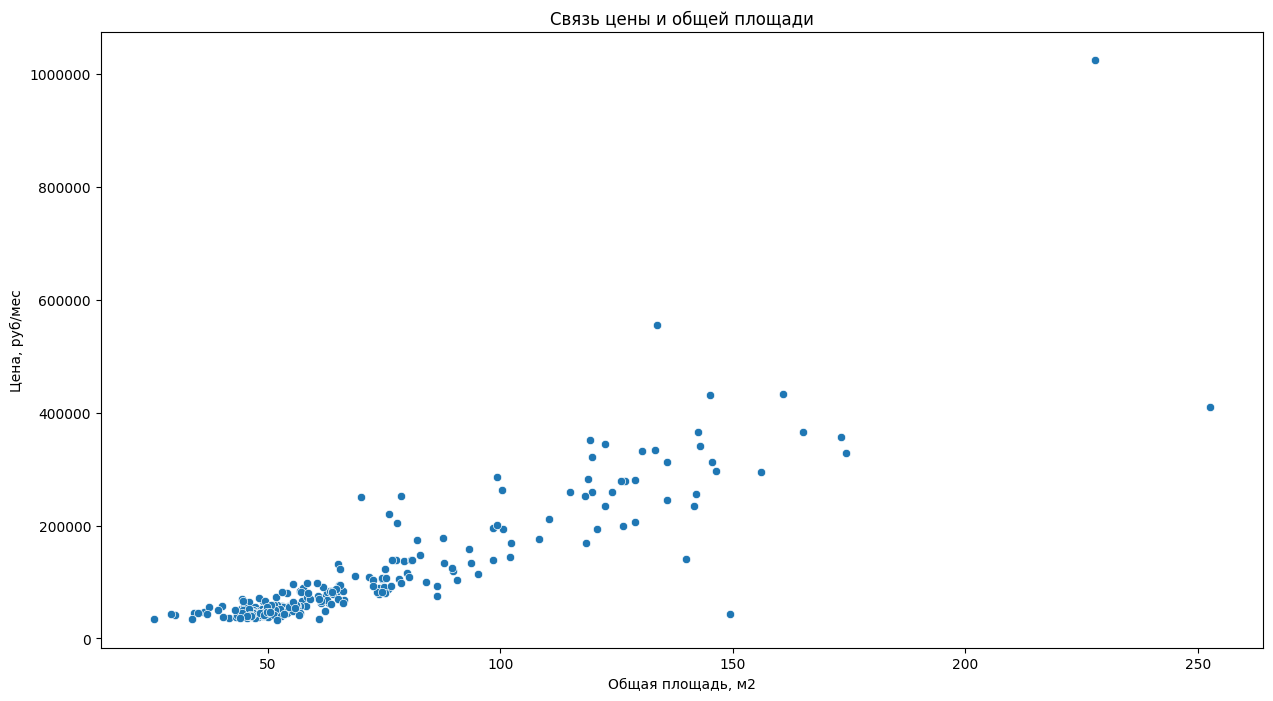

In [74]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=price_area[('Общая площадь', 'mean')], y=price_area[('Цена за месяц', 'mean')])
plt.title('Связь цены и общей площади')
plt.xlabel('Общая площадь, м2')
plt.ylabel('Цена, руб/мес')
plt.ticklabel_format(style='plain', axis='y');

Большинство квартир имеют жилую площадь до 100 м2 и цену до 200000 руб/мес

In [75]:
price_remont = df.groupby('Ремонт', as_index=False).agg({'Общая площадь':['count','mean'],'Цена за месяц':'mean'}).round(2)

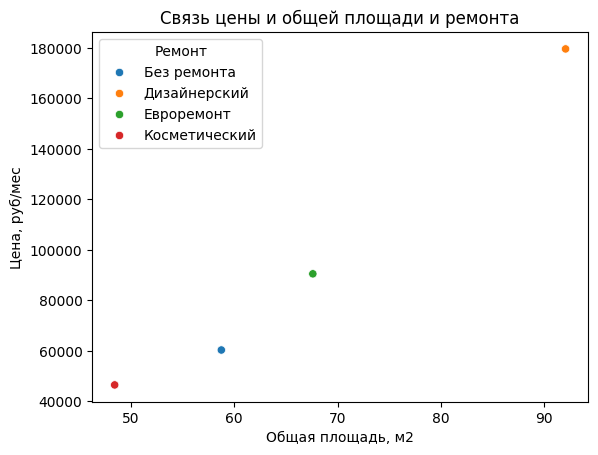

In [76]:
sns.scatterplot(x=price_remont[('Общая площадь', 'mean')], y= price_remont[('Цена за месяц', 'mean')], hue=price_remont['Ремонт'])
plt.title('Связь цены и общей площади и ремонта')
plt.xlabel('Общая площадь, м2')
plt.ylabel('Цена, руб/мес')
plt.ticklabel_format(style='plain', axis='y');

Дизайнерский ремонт самый дорогой 

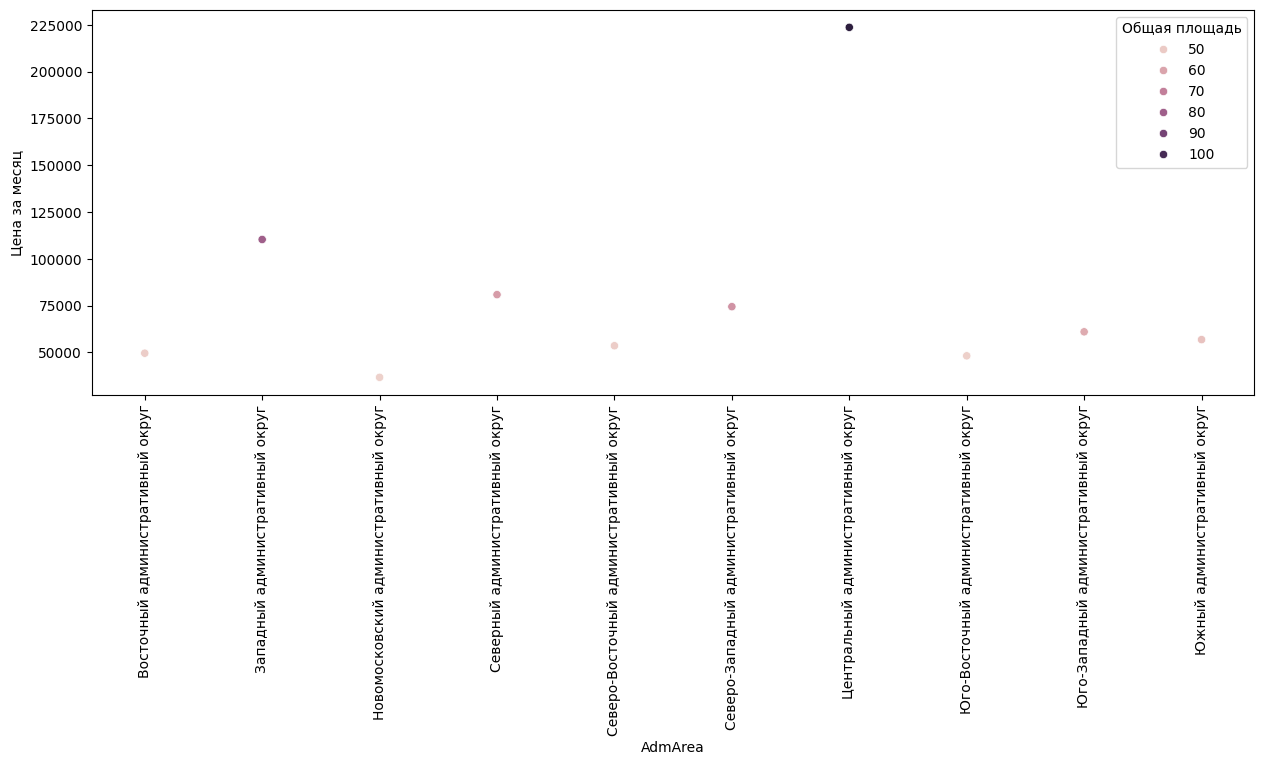

In [77]:
temp = df.groupby('AdmArea', as_index=False).agg({'Общая площадь':'mean','Цена за месяц':'mean'}).round(2)
temp
plt.figure(figsize=(15,5))
sns.scatterplot(x=temp['AdmArea'], y=temp['Цена за месяц'], hue=temp['Общая площадь'])
plt.xticks(rotation=90);

Самые дорогие и просторные квартиры находятся в Центральном административном округе

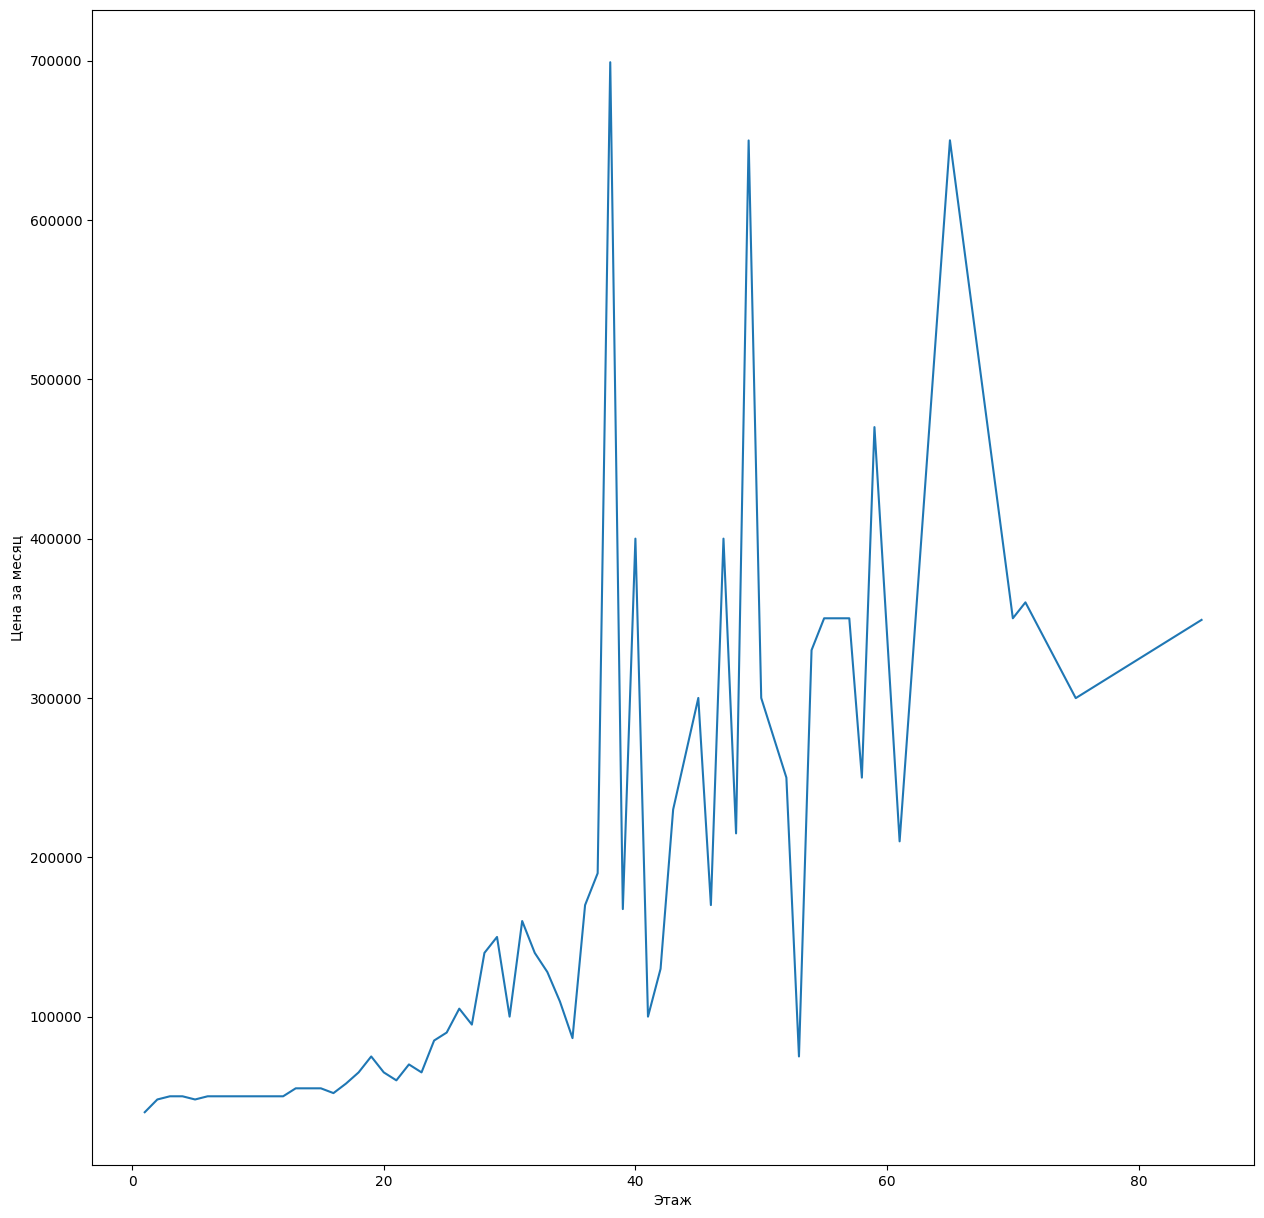

In [91]:
#Функция для нахождения первого числа в строке
def first_element(x):
    y = re.findall(r'\d+', x)
    return y[0]

df['Этаж'] = df['Дом'].map(first_element).astype('int')

data = df.groupby('Этаж').agg({'Цена за месяц': 'median'})


fig = plt.figure(figsize = (15, 15))
sns.lineplot(x=data.index, y = data['Цена за месяц'])
plt.xlabel('Этаж')
plt.ylabel('Цена за месяц');

С увеличением номера этажа средняя цена увеличивается

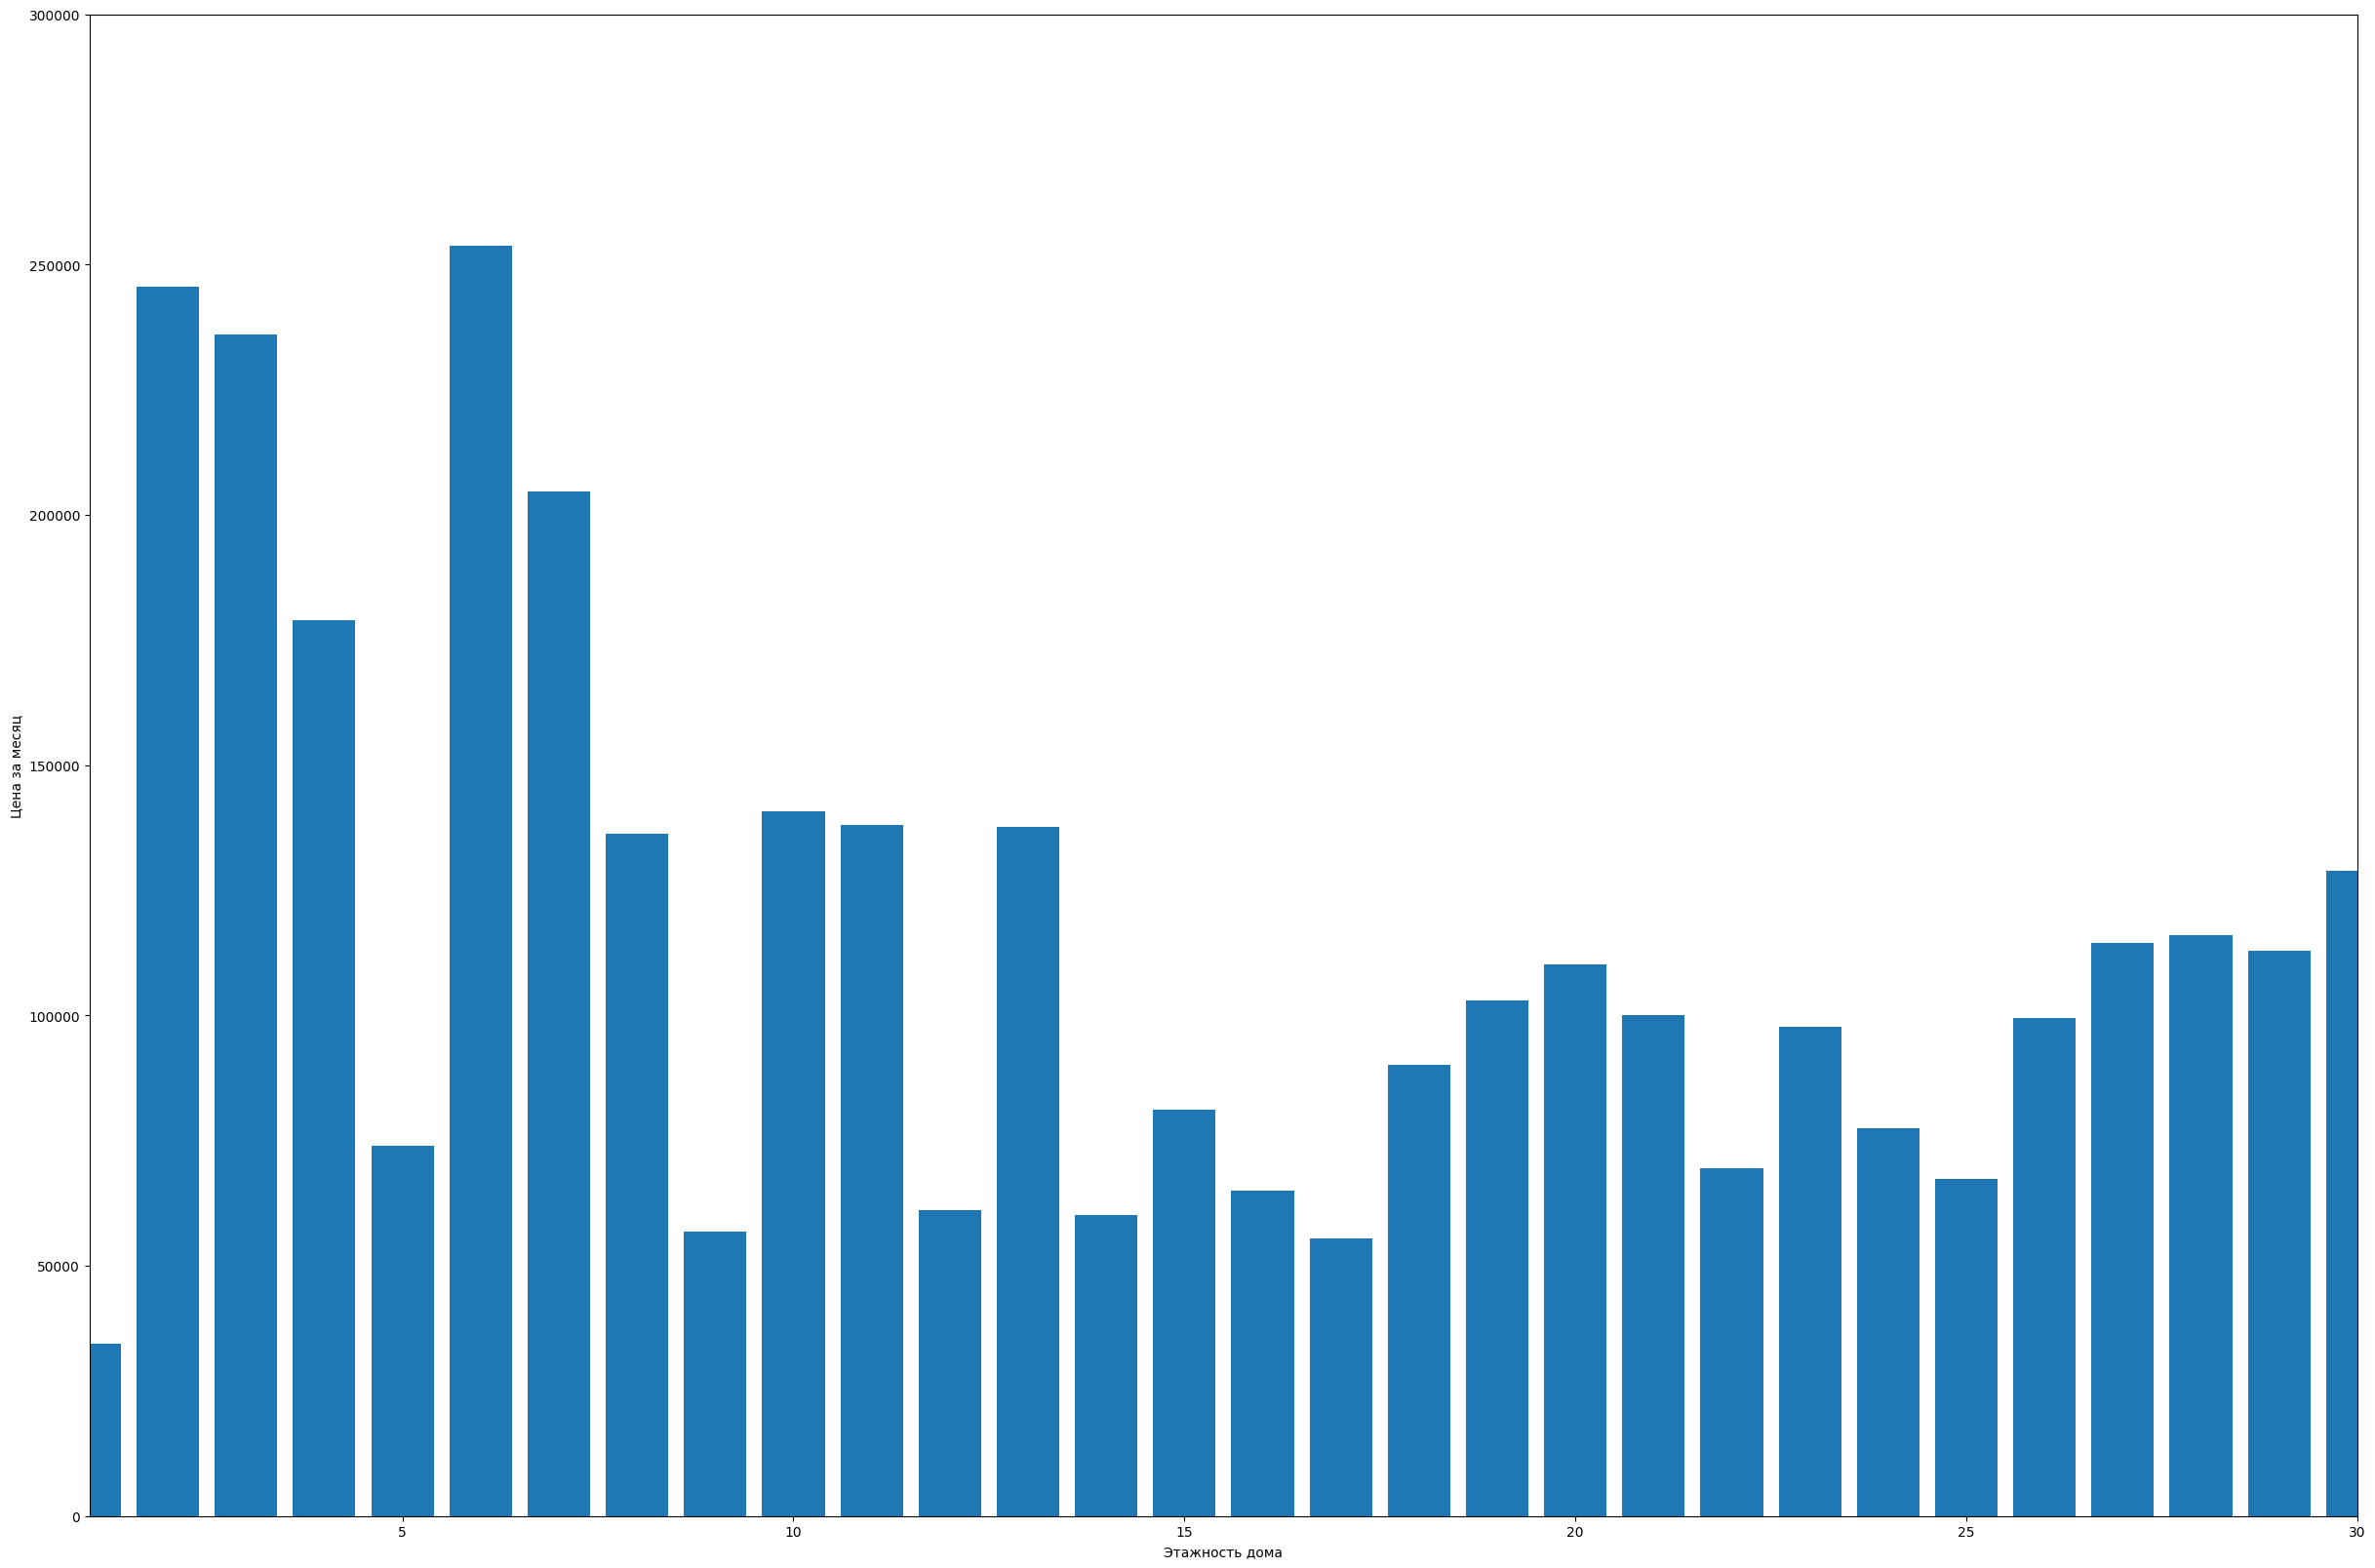

In [92]:
#Функция для нахождения второго числа в строке
def second_element(x):
    y = re.findall(r'\d+', x)
    return y[1]

df['Этажность дома'] = df['Дом'].apply(second_element).astype('int')
x = df.groupby('Этажность дома').agg({'Цена за месяц': 'mean'}).sort_index().index
y = df.groupby('Этажность дома').agg({'Цена за месяц': 'mean'}).sort_index()['Цена за месяц']
fig = plt.figure(figsize = (30, 20))
plt.bar(x, y)
plt.xlabel('Этажность дома')
plt.ylabel('Цена за месяц')
plt.xlim(1, 30)
plt.ylim(0, 300000);


От 60 этажей - Москва Сити, от 5 до 30 этажей - средний ценовой сегмент

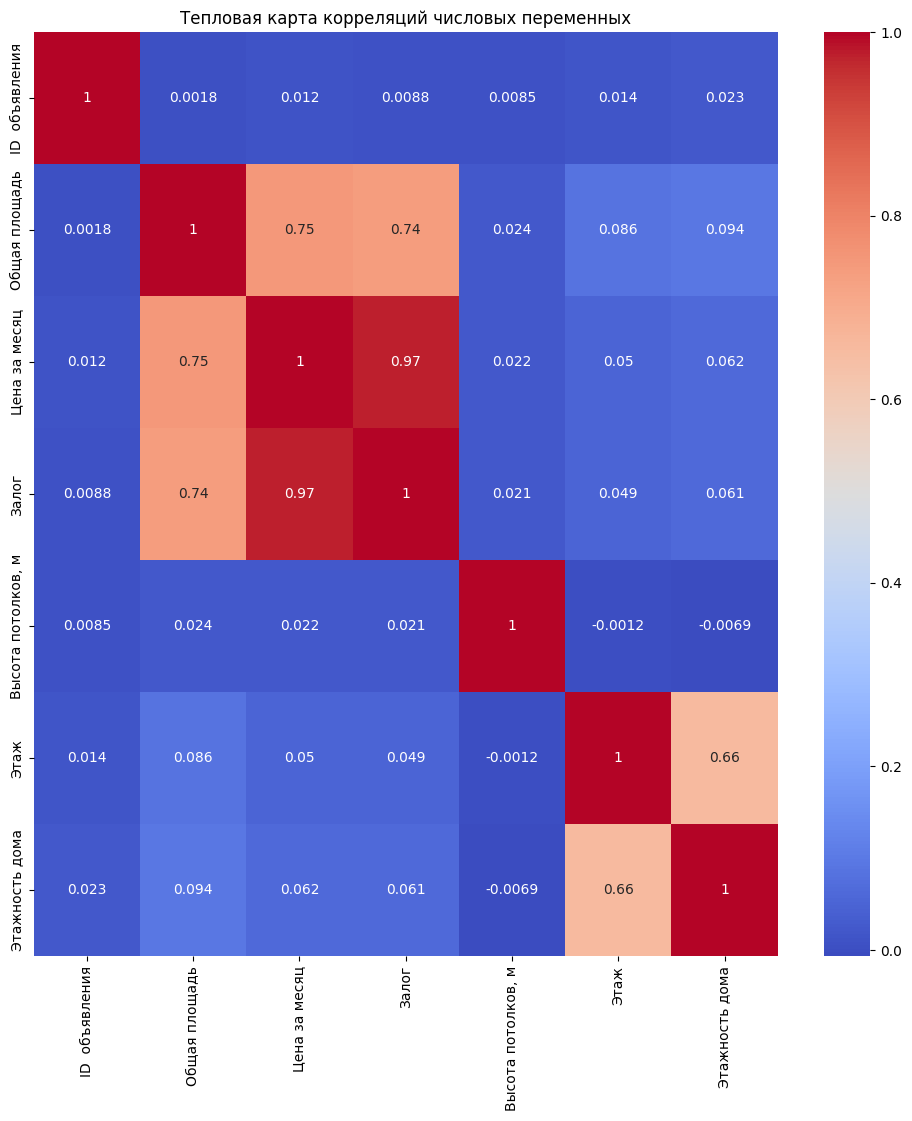

In [93]:
numeric_columns = df.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляций числовых переменных');